In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats

import statsmodels as sm
from statsmodels.regression.linear_model import OLS

import eikon as ek

import datetime

creds = 'f5a341b614d945b9b93a71fe53348ba119d11e99'
ek.set_app_key(creds)

In [28]:
#Define the Future Contracts

Futures = ['LCOc1',     #ICE Europe Brent Crude 
           'CLc1',      #NYMEX Light Sweet Crude Oil (WTI)
           'NGLNMc1',   #Intercontinetanl Exchange UK NBP Natrual Gas
           'NGc1',      #NYMEX Henry Hub Natural Gas
           'GCc1',      #COMEX Gold
           'SIc1',      #COMEX Silver
           'PLc1',      #NYM Platinum
           'PAc1',      #CYM Palladium
           'Wc1',       #CBoT Wheat
           'Cc1',       #CBoT Corn
           'LCc1',      #CME Live Cattle
           'OJc1'       #ICE Orange Juice
          ]

In [29]:
#Get the Close Prices of the futures



data = ek.get_timeseries(Futures,
                        start_date = '2012-01-01',
                        end_date = '2022-03-18',
                        fields = 'CLOSE',
                        interval = 'daily'
                        )

#data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d').dt.date # convert format to %Y-%m-%d

data

CLOSE,LCOc1,CLc1,NGLNMc1
Date,,,
2018-04-03,<NA>,63.51,<NA>
2018-04-04,<NA>,63.37,<NA>
2018-04-05,<NA>,63.54,<NA>
2018-04-06,<NA>,62.06,<NA>
2018-04-09,<NA>,63.42,<NA>
...,...,...,...
2022-03-14,106.9,103.01,270.92
2022-03-15,99.91,96.44,274.4
2022-03-16,98.02,95.04,240.81


In [ ]:
def holding_data(instrument='LCOc1', fields=[], start_year=2019, end_year=2020):
    fields = ['CLOSE']
dat, err = ek.get_data('AAPL.O',
                       fields = fields,
                       parameters={'SDate': '{}-01-01'.format(2019),
                                   'EDate': '{}-12-31'.format(2020),
                                   'Frq':'Q'}
                       )


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2637 entries, 2012-01-03 to 2022-03-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   2637 non-null   Float64
dtypes: Float64(1)
memory usage: 43.8 KB


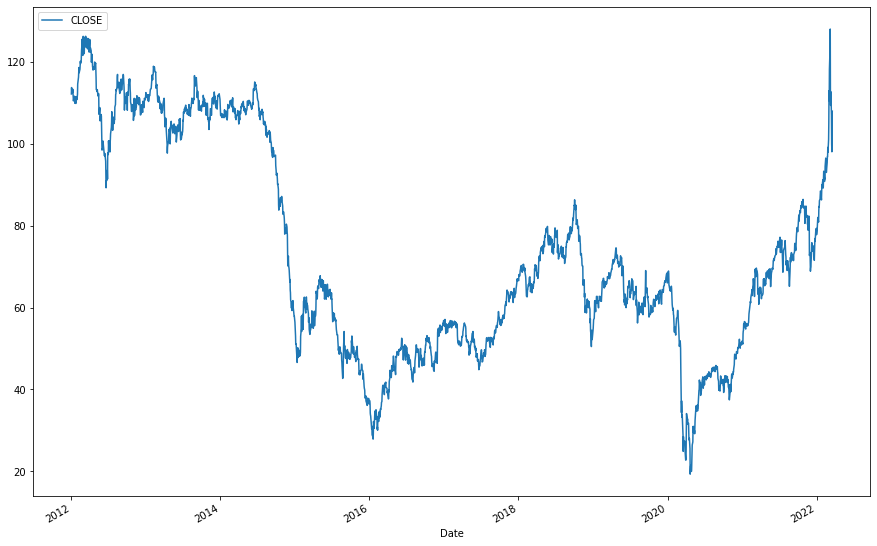

In [22]:
data.plot(subplots = True, figsize = (15,10));

In [7]:
df = ek.get_timeseries(["LCOc1"], 
                       start_date="2022-03-10",  
                       end_date="2022-03-18")
df

LCOc1,HIGH,LOW,OPEN,CLOSE,VOLUME
Date,,,,,
2022-03-10,118.36,109.0,112.65,109.33,352338
2022-03-11,113.91,107.13,110.26,112.67,287385
2022-03-14,113.15,103.49,113.15,106.9,265914
2022-03-15,105.71,97.44,105.34,99.91,318121
2022-03-16,103.7,96.93,99.14,98.02,246821
2022-03-17,107.5,97.75,98.61,106.64,200947
2022-03-18,109.59,105.78,106.8,107.93,168906


In [12]:
df, err = ek.get_data(['LCOc1', 'CLc1'], 
                      ['CF_CLOSE'],
                      {'Scale': 6, 'SDate': 0, 'EDate': -2, 'FRQ': 'FY', 'Curn': 'USD'})
df

,Instrument,CF_CLOSE
0,LCOc1,107.93
1,CLc1,102.98


In [13]:
df, err = ek.get_data(['LCOc1', 'CLc1'], 
                      ['CF_CLOSE'],
                      {'Scale': 6, 'SDate': 0, 'EDate': -2, 'FRQ': 'FY', 'Curn': 'EUR'})
df

,Instrument,CF_CLOSE
0,LCOc1,107.93
1,CLc1,102.98


In [20]:
def holding_data(instrument='AAPL.O', fields=[], start_year=2019, end_year=2020):
    fields = ['CF_CLOSE']
    


In [21]:
dat, err = ek.get_data('AAPL.O',
                       fields = fields,
                       parameters={'SDate': '{}-01-01'.format(2019),
                                   'EDate': '{}-12-31'.format(2020),
                                   'Frq':'D'}
                       )


dat['Date'] = pd.to_datetime(dat['Date'], format='%Y-%m-%d').dt.date # convert format to %Y-%m-%d

dat = dat.sort_index() # sort Date in ascending order
# data base containts weak data points: drop na's
dat = dat.dropna() # I'm ambivalent about this...

return(dat)

NameError: name 'fields' is not defined